In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
trend = pd.read_csv("/Users/user/Downloads/trends1.csv" , index_col=0)
prediction = pd.read_csv("/Users/user/Downloads/predictions.csv" , index_col=0)

In [3]:
trend['date'] = pd.to_datetime(trend['date'], format = '%m/%d/%Y')
prediction['date'] = pd.to_datetime(prediction['date'], format = '%Y-%m-%d')

In [4]:
trend.head()

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04


In [5]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   top 1   261 non-null    int64         
 1   top 2   261 non-null    int64         
 2   top 3   261 non-null    int64         
 3   date    261 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 10.2 KB


<AxesSubplot:xlabel='date', ylabel='top 1'>

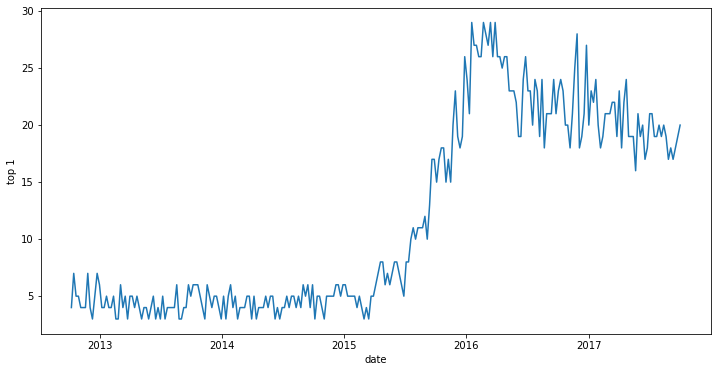

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data= trend, x="date", y="top 1")

<AxesSubplot:xlabel='date', ylabel='top 2'>

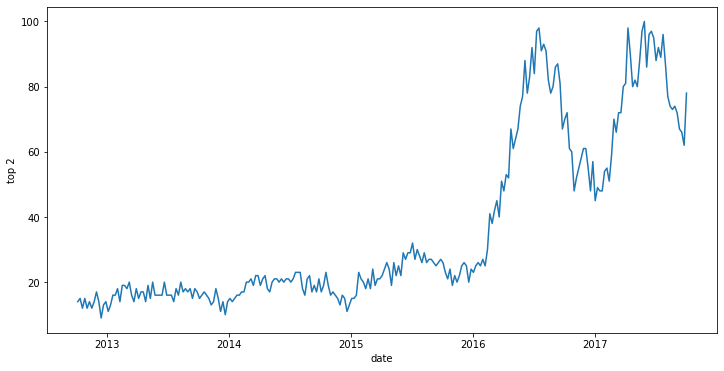

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data= trend, x="date", y="top 2")

<AxesSubplot:xlabel='date', ylabel='top 3'>

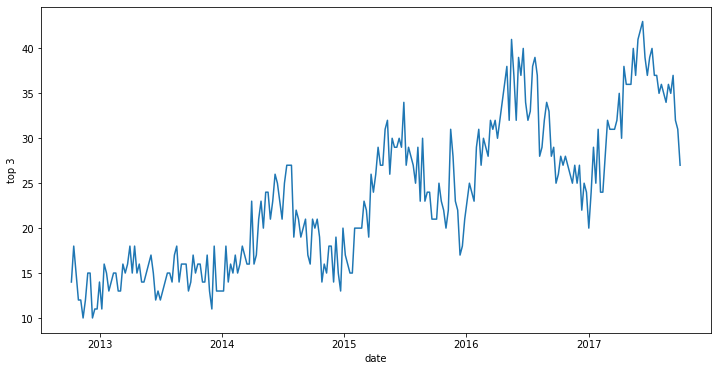

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data= trend, x="date", y="top 3")

In [9]:
trend1 = trend.melt('date', var_name ='cols',  value_name = 'vals')

C:\Users\user\anaconda3\envs\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='vals'>

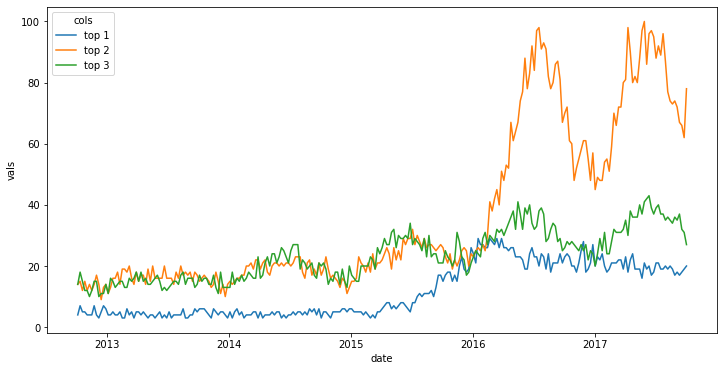

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot('date', 'vals', hue='cols', data = trend1)

In [11]:
import math
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

In [12]:
print(variance(trend['top 1']))
print(variance(trend['top 2']))
print(variance(trend['top 3']))

print(stdev(trend['top 1']))
print(stdev(trend['top 2']))
print(stdev(trend['top 3']))

71.54880286548932
705.8572540039046
66.66149939078993
8.458652544317523
26.567974217164256
8.164649373414019


### 1. Top 3 would be the 'best performance' of my choice. 

From statistics point of view, top 3 has the lowest variance and standard deviation, which translates to the data points does not deviate too much from the mean, it gives you an idea that this item will not cause a big spike or 'hype'. Based on the observations from the trend, top 3 is having a slow but steady upward trend in popularity. 

My point of view is that when the variance and standard deviation is high, this is what we call it as 'hype', and 'hype' will vanish at certain period of time. It might help the business to gain certain profit within a short period of time but it will not last long. From business perspective, i think that business would be better off to have items that help to generate a stable and steady profit as a base, then only go and chase for 'hype'.

In [13]:
prediction.head()

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650


In [14]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 625
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        626 non-null    datetime64[ns]
 1   fit top 1   626 non-null    float64       
 2   fit top 2   626 non-null    float64       
 3   fit top 3   626 non-null    float64       
 4   fit2 top 3  626 non-null    float64       
 5   fit3 top 3  626 non-null    float64       
 6   fit2 top 2  626 non-null    float64       
 7   fit3 top 2  626 non-null    float64       
 8   fit2 top 1  626 non-null    float64       
 9   fit3 top 1  626 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 53.8 KB


<AxesSubplot:xlabel='date', ylabel='vals'>

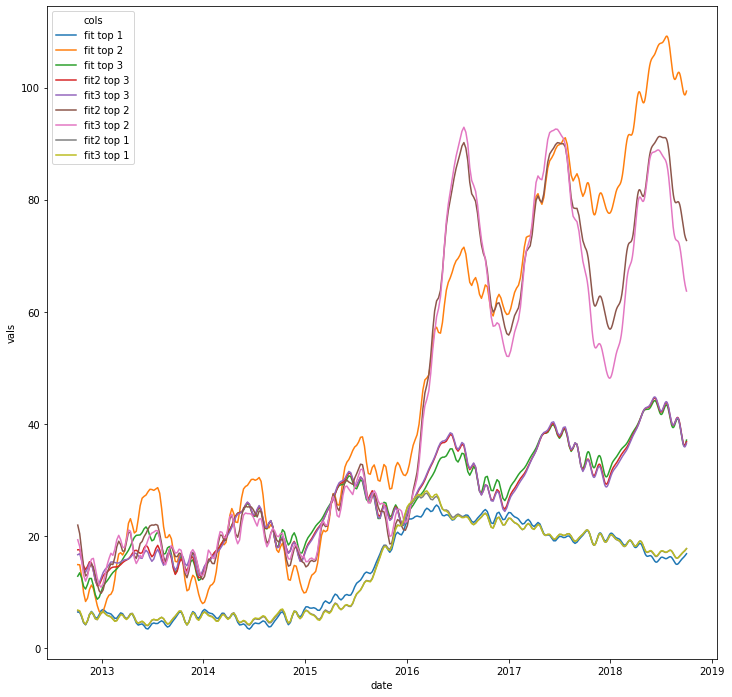

In [15]:
plt.figure(figsize=(12,12))
pred = prediction.melt('date', var_name ='cols',  value_name = 'vals')
sns.lineplot(x = 'date', y = 'vals', hue= 'cols' , data= pred)

In [16]:
combine = pd.concat([trend, prediction], axis=1, join='inner').reset_index(drop=True)
combine

,top 1,top 2,top 3,date,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,4,14,14,2012-10-07,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,7,15,18,2012-10-14,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,5,12,15,2012-10-21,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,5,15,12,2012-10-28,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,4,12,12,2012-11-04,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,18,72,35,2017-09-03,2017-09-03,18.932974,84.639440,36.390344,36.360716,36.359881,78.463999,76.071457,19.263615,19.240677
257,17,67,37,2017-09-10,2017-09-10,19.393491,83.709639,34.626105,34.651718,34.573312,77.196136,74.388551,19.681597,19.664230
258,18,66,32,2017-09-17,2017-09-17,19.792739,81.734849,32.537943,32.588455,32.443293,74.824516,71.611850,20.036997,20.028132
259,19,62,31,2017-09-24,2017-09-24,20.156876,80.605019,31.834316,31.710922,31.538420,72.704354,69.048952,20.356717,20.354703


In [17]:
from sklearn.metrics import mean_absolute_error

y_true = combine['top 1']
y_pred1 = combine['fit top 1']
y_pred2 = combine['fit2 top 1']
y_pred3 = combine['fit3 top 1']

print(mean_absolute_error(y_true, y_pred1))
print(mean_absolute_error(y_true, y_pred2))
print(mean_absolute_error(y_true, y_pred3))

1.7156599820682703
1.4057683626046702
1.3904013882908033


In [18]:
y_true = combine['top 2']
y_pred1 = combine['fit top 2']
y_pred2 = combine['fit2 top 2']
y_pred3 = combine['fit3 top 2']

print(mean_absolute_error(y_true, y_pred1))
print(mean_absolute_error(y_true, y_pred2))
print(mean_absolute_error(y_true, y_pred3))

6.60952345345765
3.3396571748358626
2.80367161643414


In [19]:
y_true = combine['top 3']
y_pred1 = combine['fit top 3']
y_pred2 = combine['fit2 top 3']
y_pred3 = combine['fit3 top 3']

print(mean_absolute_error(y_true, y_pred1))
print(mean_absolute_error(y_true, y_pred2))
print(mean_absolute_error(y_true, y_pred3))

2.379407792028913
2.007173837406215
1.9322881895278488


### 3. Fit 3

Statistically, with the least mean absolute error.

From observation, for fit 1, 2 and 3 on top 1 and 3 doesn't have a big difference. Hence, final decision falls on top 2. The end cycle of 2016 for top 2 shows a rebound in terms of popularity, and from the fit 3 has the best fit on it. While looking at end cycle of 2017, fit 1 would be eliminated due to not sync with the line.

But i do think that in real life scenario, will be having a lot of uncertainty and lags must be incorporate as well, which will not be that accurate.

# Prediction

In [20]:
from fbprophet import Prophet
## # set the uncertainty interval to 95% (the Prophet default is 80%)
model1 = Prophet(interval_width=0.95)

Importing plotly failed. Interactive plots will not work.


In [21]:
## Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), 
## rename the columns in our DataFrame:
trend_top1 = trend.rename(columns={'date': 'ds','top 1': 'y'})
trend_top1 = trend_top1.drop(columns=['top 2','top 3'])
trend_top1.head()

,y,ds
0,4,2012-10-07
1,7,2012-10-14
2,5,2012-10-21
3,5,2012-10-28
4,4,2012-11-04


In [22]:
## create and  fit the model
model1 = model1.fit(trend_top1)
model1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
## set new data frame
future_top1 = model1.make_future_dataframe(periods=36, freq='MS')
future_top1.tail()

,ds
292,2020-06-01
293,2020-07-01
294,2020-08-01
295,2020-09-01
296,2020-10-01


In [24]:
## use model to predict future count
forecast_top1 = model1.predict(future_top1)
forecast_top1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
292,2020-06-01,8.920427,-15.406850,33.336778
293,2020-07-01,8.993992,-18.106570,34.521765
294,2020-08-01,9.144605,-18.137126,36.723457
295,2020-09-01,7.959588,-20.478575,37.318854
296,2020-10-01,9.803341,-19.378098,40.145091


In [25]:
forecast_top1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sum()

yhat          3579.401397
yhat_lower    2107.465775
yhat_upper    5051.381781
dtype: float64

In [26]:
forecast_top1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].mean()

<ipython-input-26-13ce2918caee>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  forecast_top1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].mean()


yhat          12.051857
yhat_lower     7.095844
yhat_upper    17.008019
dtype: float64

In [27]:
forecast_top1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-10-07,4.103139,1.281886,9.376259,4.103139,4.103139,1.228533,1.228533,1.228533,1.228533,1.228533,1.228533,0.0,0.0,0.0,5.331672
1,2012-10-14,4.105533,1.526872,8.949748,4.105533,4.105533,1.193550,1.193550,1.193550,1.193550,1.193550,1.193550,0.0,0.0,0.0,5.299084
2,2012-10-21,4.107928,0.896695,8.338202,4.107928,4.107928,0.392388,0.392388,0.392388,0.392388,0.392388,0.392388,0.0,0.0,0.0,4.500316
3,2012-10-28,4.110322,-0.298786,7.296259,4.110322,4.110322,-0.650651,-0.650651,-0.650651,-0.650651,-0.650651,-0.650651,0.0,0.0,0.0,3.459670
4,2012-11-04,4.112716,-0.735870,6.719315,4.112716,4.112716,-1.010534,-1.010534,-1.010534,-1.010534,-1.010534,-1.010534,0.0,0.0,0.0,3.102182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2020-06-01,10.112273,-15.406850,33.336778,-14.563298,34.276049,-1.191846,-1.191846,-1.191846,-1.191846,-1.191846,-1.191846,0.0,0.0,0.0,8.920427
293,2020-07-01,9.836771,-18.106570,34.521765,-15.893021,35.339280,-0.842779,-0.842779,-0.842779,-0.842779,-0.842779,-0.842779,0.0,0.0,0.0,8.993992
294,2020-08-01,9.552086,-18.137126,36.723457,-17.552770,36.532103,-0.407481,-0.407481,-0.407481,-0.407481,-0.407481,-0.407481,0.0,0.0,0.0,9.144605
295,2020-09-01,9.267401,-20.478575,37.318854,-18.930381,37.795873,-1.307813,-1.307813,-1.307813,-1.307813,-1.307813,-1.307813,0.0,0.0,0.0,7.959588


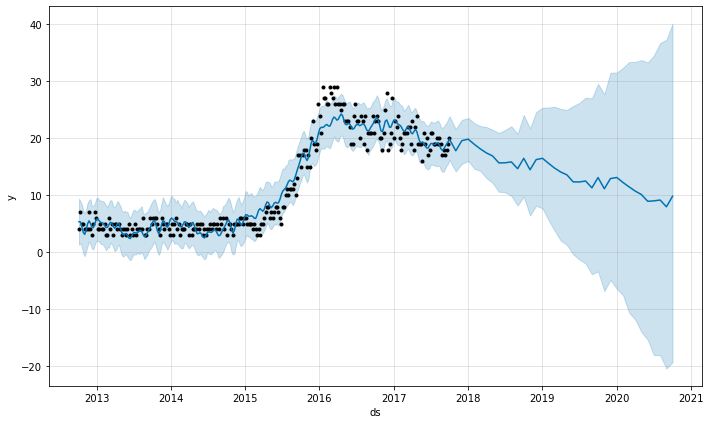

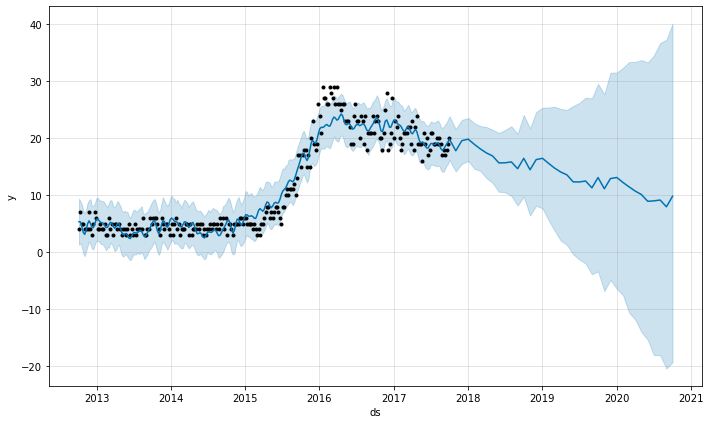

In [28]:
model1.plot(forecast_top1, uncertainty=True)

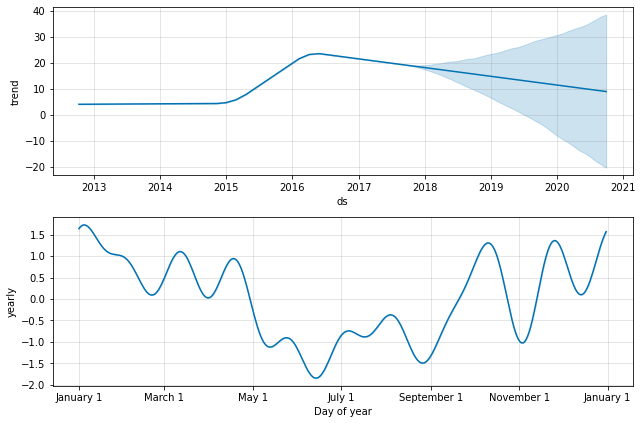

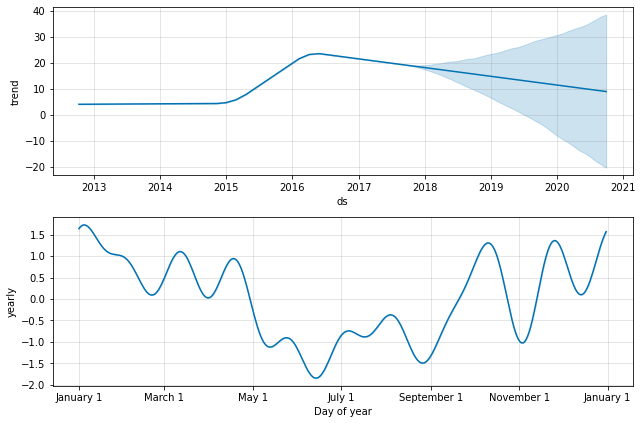

In [29]:
model1.plot_components(forecast_top1)

In [30]:
trend_top2 = trend.rename(columns={'date': 'ds','top 2': 'y'})
trend_top2 = trend_top2.drop(columns=['top 1','top 3'])
trend_top2.head()

,y,ds
0,14,2012-10-07
1,15,2012-10-14
2,12,2012-10-21
3,15,2012-10-28
4,12,2012-11-04


In [31]:
model2 = Prophet(interval_width=0.95)
model2 = model2.fit(trend_top2)
future_top2 = model2.make_future_dataframe(periods=36, freq='MS')
forecast_top2 = model2.predict(future_top2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


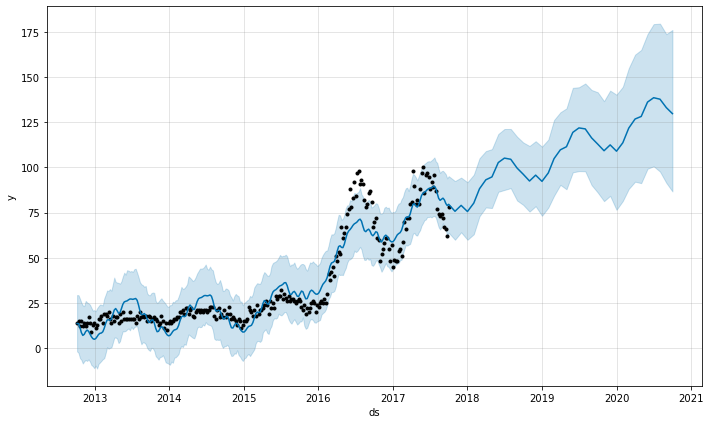

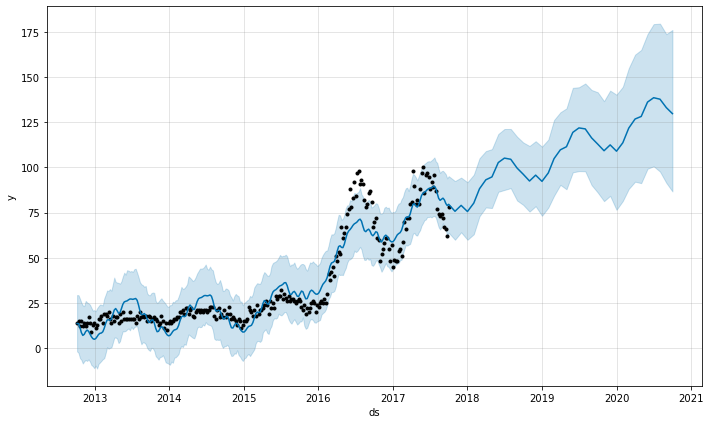

In [32]:
model2.plot(forecast_top2, uncertainty=True)

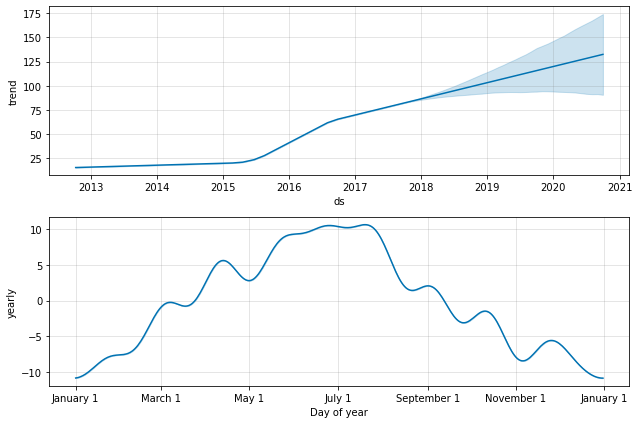

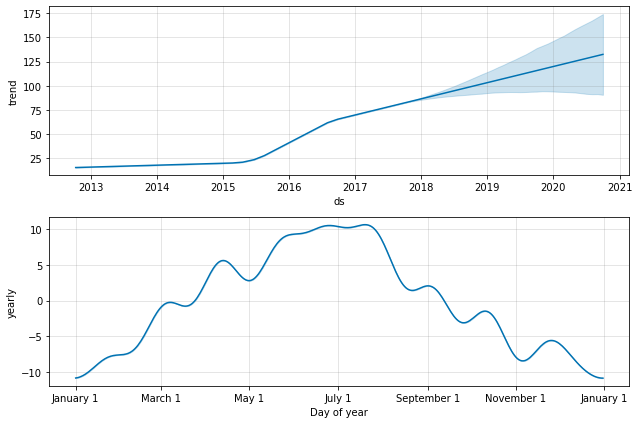

In [33]:
model2.plot_components(forecast_top2)

In [34]:
trend_top3 = trend.rename(columns={'date': 'ds','top 3': 'y'})
trend_top3 = trend_top3.drop(columns=['top 1','top 2'])
trend_top3.head()

,y,ds
0,14,2012-10-07
1,18,2012-10-14
2,15,2012-10-21
3,12,2012-10-28
4,12,2012-11-04


In [35]:
model3 = Prophet(interval_width=0.95)
model3 = model3.fit(trend_top3)
future_top3 = model3.make_future_dataframe(periods=36, freq='MS')
forecast_top3 = model3.predict(future_top2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


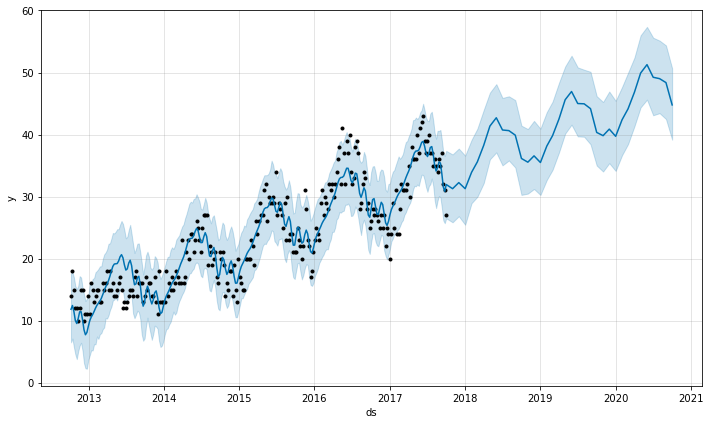

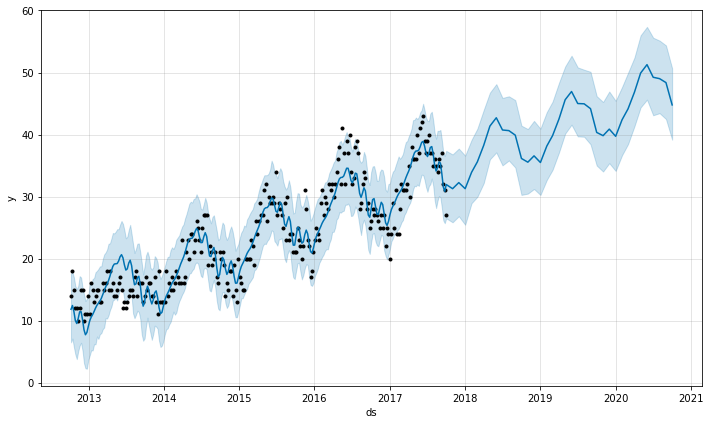

In [36]:
model3.plot(forecast_top3, uncertainty=True)

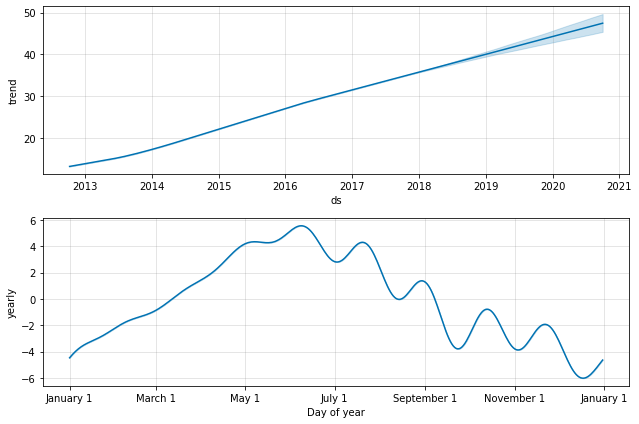

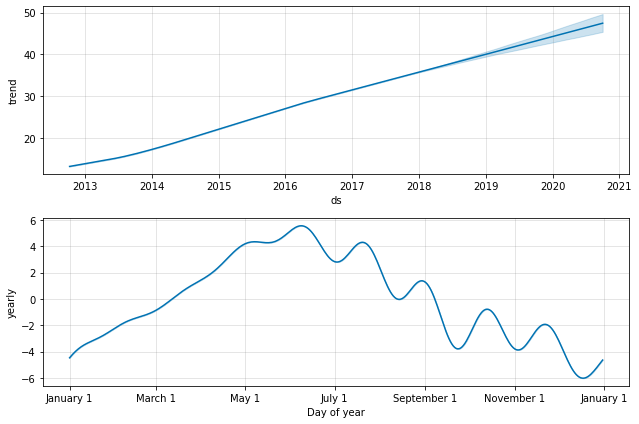

In [37]:
model3.plot_components(forecast_top3)

### Summary

Fbprophet is an additive regression model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. Would be much more flexible compared to usual automatic forecasting techniques that could be brittle and they are often too inflexible to incorporate useful assumptions or heuristics.

Another reason is due to the strong seasonalities in each of the trend. The Prophet uses a decomposable time series model with three main model components: trend, seasonality, and holidays.

Forecasts is a specialized data science skill requiring substantial experience as well. It wouldn't be easy to just come up with a best fit line and just forecast the future.

I would say the prophet works better in this scenario with the consideration of uncertainty.